# Linear Algebra Applications in Data Science

[Source](https://www.analyticsvidhya.com/blog/2019/07/10-applications-linear-algebra-data-science/)

In [1]:
import numpy as np
import pandas as pd
from seaborn import load_dataset
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

gems = load_dataset('diamonds')

## Vectors and Matrices

In the context of linear algebra, a single number is a 0-dimensional entity called a **scalar**. But it is often useful to have data in the form of a 1-dimensional object called a **vector**, which can be thought of as a list of scalars. Think here of a `pandas` Series. And in addition to the values that compose the vector, we can characterize the vector as a whole as having a **magnitude** and a **direction**.

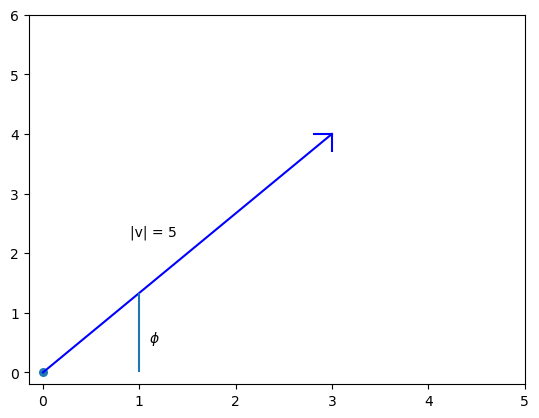

In [2]:
fig, ax = plt.subplots()

ax.plot([0, 3], [0, 4], 'b')
ax.vlines(1, ymin=0, ymax=4/3)
ax.scatter(0, 0, s=30)

# arrowhead!
ax.vlines(3, ymin=3.7, ymax=4, colors='b')
ax.hlines(4, xmin=2.8, xmax=3, colors='b')
ax.annotate('$\phi$', xy=(1.1, 0.5))
ax.annotate('|v| = 5', xy=(0.9, 2.3))
ax.set_xlim(right=5)
ax.set_ylim(top=6);

We have been working all along with arrays and data frames that have a tabular structure of rows and columns. Such a 2-dimensional structure of numerical elements is known in linear algebra as a **matrix**.

In [3]:
gems.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
gems.head().values

array([[0.23, 'Ideal', 'E', 'SI2', 61.5, 55.0, 326, 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', 'SI1', 59.8, 61.0, 326, 3.89, 3.84, 2.31],
       [0.23, 'Good', 'E', 'VS1', 56.9, 65.0, 327, 4.05, 4.07, 2.31],
       [0.29, 'Premium', 'I', 'VS2', 62.4, 58.0, 334, 4.2, 4.23, 2.63],
       [0.31, 'Good', 'J', 'SI2', 63.3, 58.0, 335, 4.34, 4.35, 2.75]],
      dtype=object)

Sometimes we want 3- or even higher-dimensional objects. Think for example of a digital image where we record the red, green, and blue values *for each pixel in the 2d array*. The linear algebraic abstraction we need for such an object is called a **tensor**.

In [5]:
np.random.seed(42)

tensor = np.round(np.random.rand(3, 5, 5), 1)
tensor

array([[[0.4, 1. , 0.7, 0.6, 0.2],
        [0.2, 0.1, 0.9, 0.6, 0.7],
        [0. , 1. , 0.8, 0.2, 0.2],
        [0.2, 0.3, 0.5, 0.4, 0.3],
        [0.6, 0.1, 0.3, 0.4, 0.5]],

       [[0.8, 0.2, 0.5, 0.6, 0. ],
        [0.6, 0.2, 0.1, 0.9, 1. ],
        [0.8, 0.3, 0.1, 0.7, 0.4],
        [0.1, 0.5, 0. , 0.9, 0.3],
        [0.7, 0.3, 0.5, 0.5, 0.2]],

       [[1. , 0.8, 0.9, 0.9, 0.6],
        [0.9, 0.1, 0.2, 0. , 0.3],
        [0.4, 0.3, 0.8, 0.4, 0.3],
        [0.5, 0.1, 0.8, 0.1, 1. ],
        [0.8, 0.2, 0. , 0.8, 0.7]]])

In [6]:
tensor[0][0][0]

0.4

## Matrix Arithmetic

Matrices can be added and multiplied, and there are other distinctive operations on matrices that are often useful.

<details>
    <summary><b>Matrix Addition</b>: Click for Illustration</summary>
$\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
+
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}
=
\begin{bmatrix}
a_{11} + b_{11} & a_{12} + b_{12} \\
a_{21} + b_{21} & a_{22} + b_{22}
\end{bmatrix}
$
    </details>

In [7]:
np.random.seed(42)
my_matrix1 = np.random.randint(low=1, high=11, size=(2, 2))
my_matrix1

array([[7, 4],
       [8, 5]])

In [8]:
my_matrix2 = np.random.randint(low=1, high=11, size=(2, 2))
my_matrix2

array([[ 7, 10],
       [ 3,  7]])

In [9]:
my_matrix1 + my_matrix2

array([[14, 14],
       [11, 12]])

\<details>
    <summary><b>Matrix Multiplication</b>: Click for Illustration</summary>
$$
\begin{equation}
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2}
\end{bmatrix}
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2}
\end{bmatrix}
=
\begin{bmatrix}
a_{1,1}\times b_{1,1} + a_{1,2}\times b_{2,1} & a_{1,1}\times b_{1,2} + a_{1,2}\times b_{2,2} \\
a_{2,1}\times b_{1,1} + a_{2,2}\times b_{2,1} & a_{2,1}\times b_{1,2} + a_{2,2}\times b_{2,2}
\end{bmatrix}
\end{equation}
$$
    </details>

In [10]:
my_matrix1.dot(my_matrix2)

array([[ 61,  98],
       [ 71, 115]])

## Applications

### Distance Calculations

There are many times when we need to measure distances. For example, many modeling algorithms rely on a notion of **similarity** between data points. But we have already seen how distance is used to construct a linear model: Choose the betas that minimize the sum of squared **distances** between true and predicted $y$-values.

Consider this distance for *all* data points at once: We can think of that as a vector: $\vec{(y_i - \hat{y_i})^2}$.

And in fact there are multiple ways to measure the magnitude of a vector. Typically, we are thinking of Euclidean spaces and so use the **L2 norm** to measure the magnitude of a vector:

In [11]:
my_vec = np.array([3, 4, 12])

In [12]:
np.sqrt(3**2 + 4**2 + 12**2)

13.0

In [13]:
np.linalg.norm(my_vec)

13.0

But there are other norms we can use. In general, the **$n$-norm** will calculate $(x_1^n + ... + x_m^n)^{\frac{1}{n}}$ for a vector $\vec{x_i}$.

In [44]:
np.linalg.norm(my_vec, ord=2)

13.0

### Correlation

We can express covariance and correlation matrices as linear-algebraic transformations:

For a centered data matrix $M$:
- $cov(M) = \frac{1}{n-1}M^TM$, where $n$ is the number of observations.

A centered data matrix is one whose column means are all 0.

This equation makes use of the **transpose** of a matrix $M$, $M^T$, which is the matrix that results from swapping the rows and columns of $M$. You can also think of this as a *reflection* of the elements of $M$ about the main diagonal of $M$.

In [11]:
my_matrix1

array([[7, 4],
       [8, 5]])

In [12]:
my_matrix_transposed = my_matrix1.T
my_matrix_transposed

array([[7, 8],
       [4, 5]])

Let's illustrate this equation. Suppose we have ten observations (rows) for each of three variables (columns).

In [13]:
np.random.seed(42)
mat_1 = np.random.rand(10, 3)
mat_1

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184],
       [0.45606998, 0.78517596, 0.19967378],
       [0.51423444, 0.59241457, 0.04645041]])

In [14]:
mat_1_centered = mat_1 - np.mean(mat_1, axis=0)

In [15]:
mat_1_centered.T.dot(mat_1_centered) / 9

array([[ 0.06245653, -0.03833006, -0.01323947],
       [-0.03833006,  0.10612618, -0.00378735],
       [-0.01323947, -0.00378735,  0.08823377]])

In [16]:
cov = np.cov(mat_1, rowvar=False)

cov

array([[ 0.06245653, -0.03833006, -0.01323947],
       [-0.03833006,  0.10612618, -0.00378735],
       [-0.01323947, -0.00378735,  0.08823377]])

<details>
    <summary>Bonus: Correlation Matrices</summary>
    To calculate a correlation matrix, we can multiply the covariance matrix on both sides by a diagonal matrix of the reciprocals of the standard deviations of the columns. [Source](https://blogs.sas.com/content/iml/2010/12/10/converting-between-correlation-and-covariance-matrices.html)

<code>stds = np.sqrt(np.diag(cov))
np.diag(stds\*\*-1).dot(cov).dot(np.diag(stds\*\*-1))
np.corrcoef(mat_1, rowvar=False)
</code>
    </details>

## Solving a System of Equations

In elementary algebra we start by solving one equation for one unknown.

![image from mathelp.org](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnrLW6J0FYge6zWDKqRrAtWx4Jf0HkhMiwHQ&usqp=CAU) source: mathelp.org

Linear algebra gives us the tools to solve many equations simultaneously. Suppose we have:

$$ \begin{align}
 x_1 - 2x_2 + 3x_3 &= 9 \\
 2x_1 - 5x_2 + 10x_3 &= 4 \\
 6x_3 &= 0 
\end{align}$$

We can write these equations as a single matrix equation:

$$ 
\begin{bmatrix} 
    1 & -2 & 3 \\
    2 & -5 & 10 \\
    0 & 0 & 6
\end{bmatrix}
\begin{bmatrix} 
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix}
=
\begin{bmatrix} 
    9 \\
    4 \\
    0
\end{bmatrix}
$$

Or: $A\vec{x} = \vec{b}$, where

- $A = \begin{bmatrix} 
    1 & -2 & 3 \\
    2 & -5 & 10 \\
    0 & 0 & 6
\end{bmatrix}$

- $\vec{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$, and

- $\vec{b} = \begin{bmatrix} 9 \\ 4 \\ 0 \end{bmatrix}$

So now we're solving for a *vector* of unknowns. To solve $A\vec{x} = \vec{b}$ for $x$, we multiply both sides of the equation by **$A^{-1}$, the inverse of $A$**:

$A^{-1}A\vec{x} = \vec{x} = A^{-1}b$

In just the way that multiplying a scalar by its multiplicative inverse produces 1:

In [17]:
42 * 42**-1

1.0

so multiplying a matrix by its matrix inverse produces $I$, the **identity matrix**, a square matrix with 1's down the main diagonal and 0's everywhere else.

> $$\begin{align}
    I_3 &= \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \\
    \\
    I_5 &= \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 \\
                           0 & 1 & 0 & 0 & 0 & 0 \\
                           0 & 0 & 1 & 0 & 0 & 0 \\
                           0 & 0 & 0 & 1 & 0 & 0 \\
                           0 & 0 & 0 & 0 & 1 & 0 \\
                           0 & 0 & 0 & 0 & 0 & 1 \\                           
            \end{bmatrix}
\end{align}$$

Inverse and identity matrices have important properties:

- $IA = A$
- $AI = A$
- $AA^{-1} = I$
- $A^{-1}A = I$
- $I\vec{x} = \vec{x}$

In [18]:
A = np.array([
    [1, -2,  3],
    [2, -5, 10],
    [0,  0,  6]
])

b = np.array([9, 4, 0]).reshape(3, 1)

print('A:')
print(A)
print()
print('b:')
print(b)

A:
[[ 1 -2  3]
 [ 2 -5 10]
 [ 0  0  6]]

b:
[[9]
 [4]
 [0]]


In [19]:
# Find the inverse

A_inv = np.linalg.inv(A)
print(A_inv)

# Getting the solution

x1, x2, x3 = A_inv @ b
print(f"x1 = {x1[0]}, x2 = {x2[0]}, x3 = {x3[0]}")

[[ 5.         -2.          0.83333333]
 [ 2.         -1.          0.66666667]
 [ 0.          0.          0.16666667]]
x1 = 37.0, x2 = 14.0, x3 = 0.0


In [20]:
A.dot(np.array([x1, x2, x3]))

array([[9.],
       [4.],
       [0.]])

### Solve It Faster with NumPy's `linalg.solve()`

NumPy's ```linalg``` module has a ```.solve()``` method that you can use to solve a system of linear equations!

In particular, it will solve for the vector $\vec{x}$ in the equation $A\vec{x} = b$. You should know that, "under the hood", the ```.solve()``` method does NOT compute the inverse matrix $A^{-1}$. This is largely because of the enormous expense of directly computing a matrix inverse, which takes $\mathcal{O}(n^3)$ time.

Check out [this discussion](https://stackoverflow.com/questions/31256252/why-does-numpy-linalg-solve-offer-more-precise-matrix-inversions-than-numpy-li) on stackoverflow for more on the differences between using `.solve()` and `.inv()`.

And check out the documentation for ```.solve()``` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html).

In [21]:
# Let's use the .solve() method to solve this system of equations

A = np.array([
    [1, -2,  3],
    [2, -5, 10],
    [0,  0,  6]
])

b = np.array([9, 4, 0]).reshape(3, 1)

np.linalg.solve(A, b)

array([[37.],
       [14.],
       [ 0.]])

Again, we could just solve our matrix equation by calculating the inverse of our matrix $A$ and then multiplying by $b$:

In [26]:
np.linalg.inv(A).dot(b)

array([[37.],
       [14.],
       [ 0.]])

But the time difference is striking:

In [22]:
%timeit np.linalg.inv(A).dot(b)

3.82 µs ± 41.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%timeit np.linalg.solve(A, b)

5.98 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Even for a (tiny!) 5x5 matrix, the cost of computing the inverse directly is evident.

## Linear Regression

Consider now a typical dataset and the associated multiple linear regression problem. We have many observations (rows), each of which consists of a set of values both for the predictors (columns, i.e. the independent variables) and for the target (the dependent variable).

For the equation $A\vec{x} = \vec{c}$, we can think of the values of the independent variables (i.e. the data matrix, "X") as our matrix $A$ of coefficients and of the values of the dependent variable (i.e. the target, "y") as our output vector $\vec{c}$.

The task here is, in effect, to solve for $\vec{\beta}$, where we have that $A\vec{\beta} = \vec{c}$, except in general we'll have more rows than columns. But more rows than columns means more equations than unknowns, which means that in general **there is no solution**. This is why instead we go for an optimization--in our case, a best-fit line. So we have $A\vec{\beta}\approx\vec{c}$.

Using $a$ for our independent variables and $c$ for our dependent variable, we have:


\begin{equation}
\beta_1\begin{bmatrix}
a_{1,1} \\
. \\
. \\
. \\
a_{m,1}
\end{bmatrix} +
... + \beta_n\begin{bmatrix}
a_{1,n} \\
. \\
. \\
. \\
a_{m,n}
\end{bmatrix} \approx \begin{bmatrix}
c_1 \\
.  \\
.  \\
.  \\
c_m
\end{bmatrix}
\end{equation}

### Linear Algebra Solves the Best-Fit Line Problem

If we have a matrix of predictors $X$ and a target column $y$, we can express $\vec{\beta}$, the vectorized parameters of the best-fit line, as  follows:

$\large\vec{\beta} = (X^TX)^{-1}X^Ty$.

$(X^TX)^{-1}X^T$ is sometimes called the *pseudo-inverse* of $X$.

Let's see this in action:

In [23]:
np.random.seed(42)

preds = np.array(list(zip(np.random.normal(size=10),
                          np.array(np.random.normal(size=10, loc=2)))))
target = np.array(np.random.exponential(size=10))

preds

array([[ 0.49671415,  1.53658231],
       [-0.1382643 ,  1.53427025],
       [ 0.64768854,  2.24196227],
       [ 1.52302986,  0.08671976],
       [-0.23415337,  0.27508217],
       [-0.23413696,  1.43771247],
       [ 1.57921282,  0.98716888],
       [ 0.76743473,  2.31424733],
       [-0.46947439,  1.09197592],
       [ 0.54256004,  0.5876963 ]])

In [24]:
np.linalg.inv(preds.T.dot(preds)).dot(preds.T).dot(target)

array([0.45404034, 0.2599216 ])

In [25]:
LinearRegression(fit_intercept=False).fit(preds, target).coef_

array([0.45404034, 0.2599216 ])

## A Taste of What's Coming

### Eigenvalues, Singular Values, Principal Components

It is often useful to express a matrix as a **product** of other matrices. Sometimes the gain is only in computational efficiency, but there are also certain factorizations or **decompositions** that are useful in other ways.

An **eigendecomposition** reduces a matrix to a collection of vectors that capture the *linear* action of the matrix. Selecting the vectors that produce the largest such linear transformations is the idea behind **principal component analysis**, which is useful for reducing high-dimensional datasets to lower-dimensional problems.

Eigendecompositions are possibly only for square matrices; a **singular value decomposition** is a more fundamental matrix factorization that can be applied to any matrix.

### Recommendation Systems

How do recommendation engines work?

Imagine representing your interests (film genres, book subjects, music styles) as a **vector**: larger numbers represent larger preferences. Now do this for multiple people. Now we can think of comparing these vectors directly or against some target such as whether a given product/service was used/bought/watched.

### Clustering

When our data is **unlabeled** we have a problem in **unsupervised learning**. One major strategy for this type of problem is to impose a *similarity* metric on our data points. Similarity between data points is measured as some function of the **(vector) distance** between them.

### Cosine Similarity

One similarity metric for vectors is **cosine similarity**, which computes the *cosine of the angle between them*. Note that this is always well-defined for non-zero vectors since any two vectors determine a plane (in which the angle can be measured).

### Images

We saw already above the idea of representing a digital image as a **tensor** of values that encode facts about each pixel in the digitization.

**Neural networks** are good for working with tensors of high dimension. Such objects often need to be manipulated into different shapes, and the `.reshape()` method is great for this.

In [32]:
tensor

array([[[0.4, 1. , 0.7, 0.6, 0.2],
        [0.2, 0.1, 0.9, 0.6, 0.7],
        [0. , 1. , 0.8, 0.2, 0.2],
        [0.2, 0.3, 0.5, 0.4, 0.3],
        [0.6, 0.1, 0.3, 0.4, 0.5]],

       [[0.8, 0.2, 0.5, 0.6, 0. ],
        [0.6, 0.2, 0.1, 0.9, 1. ],
        [0.8, 0.3, 0.1, 0.7, 0.4],
        [0.1, 0.5, 0. , 0.9, 0.3],
        [0.7, 0.3, 0.5, 0.5, 0.2]],

       [[1. , 0.8, 0.9, 0.9, 0.6],
        [0.9, 0.1, 0.2, 0. , 0.3],
        [0.4, 0.3, 0.8, 0.4, 0.3],
        [0.5, 0.1, 0.8, 0.1, 1. ],
        [0.8, 0.2, 0. , 0.8, 0.7]]])

In [33]:
tensor.reshape(5, 15)

array([[0.4, 1. , 0.7, 0.6, 0.2, 0.2, 0.1, 0.9, 0.6, 0.7, 0. , 1. , 0.8,
        0.2, 0.2],
       [0.2, 0.3, 0.5, 0.4, 0.3, 0.6, 0.1, 0.3, 0.4, 0.5, 0.8, 0.2, 0.5,
        0.6, 0. ],
       [0.6, 0.2, 0.1, 0.9, 1. , 0.8, 0.3, 0.1, 0.7, 0.4, 0.1, 0.5, 0. ,
        0.9, 0.3],
       [0.7, 0.3, 0.5, 0.5, 0.2, 1. , 0.8, 0.9, 0.9, 0.6, 0.9, 0.1, 0.2,
        0. , 0.3],
       [0.4, 0.3, 0.8, 0.4, 0.3, 0.5, 0.1, 0.8, 0.1, 1. , 0.8, 0.2, 0. ,
        0.8, 0.7]])

In [34]:
tensor.reshape(1, 75)

array([[0.4, 1. , 0.7, 0.6, 0.2, 0.2, 0.1, 0.9, 0.6, 0.7, 0. , 1. , 0.8,
        0.2, 0.2, 0.2, 0.3, 0.5, 0.4, 0.3, 0.6, 0.1, 0.3, 0.4, 0.5, 0.8,
        0.2, 0.5, 0.6, 0. , 0.6, 0.2, 0.1, 0.9, 1. , 0.8, 0.3, 0.1, 0.7,
        0.4, 0.1, 0.5, 0. , 0.9, 0.3, 0.7, 0.3, 0.5, 0.5, 0.2, 1. , 0.8,
        0.9, 0.9, 0.6, 0.9, 0.1, 0.2, 0. , 0.3, 0.4, 0.3, 0.8, 0.4, 0.3,
        0.5, 0.1, 0.8, 0.1, 1. , 0.8, 0.2, 0. , 0.8, 0.7]])

## Level Up: Matrix Equations

Many transformations of *products* of matrices can be expressed in terms of the transformation applied to the factors *in reverse order*.

$(AB)^T = B^TA^T$

In [35]:
A = np.random.randint(low=1, high=11, size=(10, 2))
B = np.random.randint(low=1, high=11, size=(2, 6))

In [36]:
(A.dot(B)).T

array([[ 92, 134,  46,  80,  72,  38,  76,  40,  84,  92],
       [ 74,  88,  24,  57,  37,  30,  60,  22,  54,  48],
       [110, 180,  68, 103, 107,  46,  92,  58, 114, 136],
       [ 84,  98,  26,  64,  40,  34,  68,  24,  60,  52],
       [ 70, 140,  60,  75,  95,  30,  60,  50,  90, 120],
       [ 28,  56,  24,  30,  38,  12,  24,  20,  36,  48]])

In [37]:
B.T.dot(A.T)

array([[ 92, 134,  46,  80,  72,  38,  76,  40,  84,  92],
       [ 74,  88,  24,  57,  37,  30,  60,  22,  54,  48],
       [110, 180,  68, 103, 107,  46,  92,  58, 114, 136],
       [ 84,  98,  26,  64,  40,  34,  68,  24,  60,  52],
       [ 70, 140,  60,  75,  95,  30,  60,  50,  90, 120],
       [ 28,  56,  24,  30,  38,  12,  24,  20,  36,  48]])

$(AB)^{-1} = B^{-1}A^{-1}$

In [38]:
A = np.random.randint(low=1, high=11, size=(3, 3))
B = np.random.randint(low=1, high=11, size=(3, 3))

In [39]:
np.linalg.inv(A.dot(B))

array([[ 0.05294689,  0.14637306, -0.15495466],
       [-0.05569948, -0.31606218,  0.29145078],
       [-0.06994819, -0.10621762,  0.14507772]])

In [40]:
np.linalg.inv(B).dot(np.linalg.inv(A))

array([[ 0.05294689,  0.14637306, -0.15495466],
       [-0.05569948, -0.31606218,  0.29145078],
       [-0.06994819, -0.10621762,  0.14507772]])

## Level Up: The Determinant

### Determinant

The **determinant** of a square matrix $M$, $|M|$, represents the area (or, in higher dimensions, the volume) of the parallelogram (parallelepiped) formed by the rows or columns of $M$. And it is also related to the inverse of $M$.

For a 2x2 matrix $\begin{bmatrix} a & b \\ c & d\end{bmatrix}$, the determinant is equal to $ad - bc$.

In [41]:
my_matrix1

array([[7, 4],
       [8, 5]])

In [42]:
np.linalg.det(my_matrix1)

2.9999999999999996

In [43]:
a = my_matrix1[0][0]
d = my_matrix1[1][1]
b = my_matrix1[0][1]
c = my_matrix1[1][0]

a*d - b*c

3